In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Placement_Task/ML_06/train_u6lujuX_CVtuZ9i (1).csv')

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df.reset_index(inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              480 non-null    int64  
 1   Loan_ID            480 non-null    object 
 2   Gender             480 non-null    object 
 3   Married            480 non-null    object 
 4   Dependents         480 non-null    object 
 5   Education          480 non-null    object 
 6   Self_Employed      480 non-null    object 
 7   ApplicantIncome    480 non-null    int64  
 8   CoapplicantIncome  480 non-null    float64
 9   LoanAmount         480 non-null    float64
 10  Loan_Amount_Term   480 non-null    float64
 11  Credit_History     480 non-null    float64
 12  Property_Area      480 non-null    object 
 13  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(2), object(8)
memory usage: 52.6+ KB


In [10]:
df.drop(columns = ['Loan_ID'],inplace = True)

In [11]:
 categorical_columns = [i for i in df.columns if df[i].dtypes == 'object']

In [12]:
categorical_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

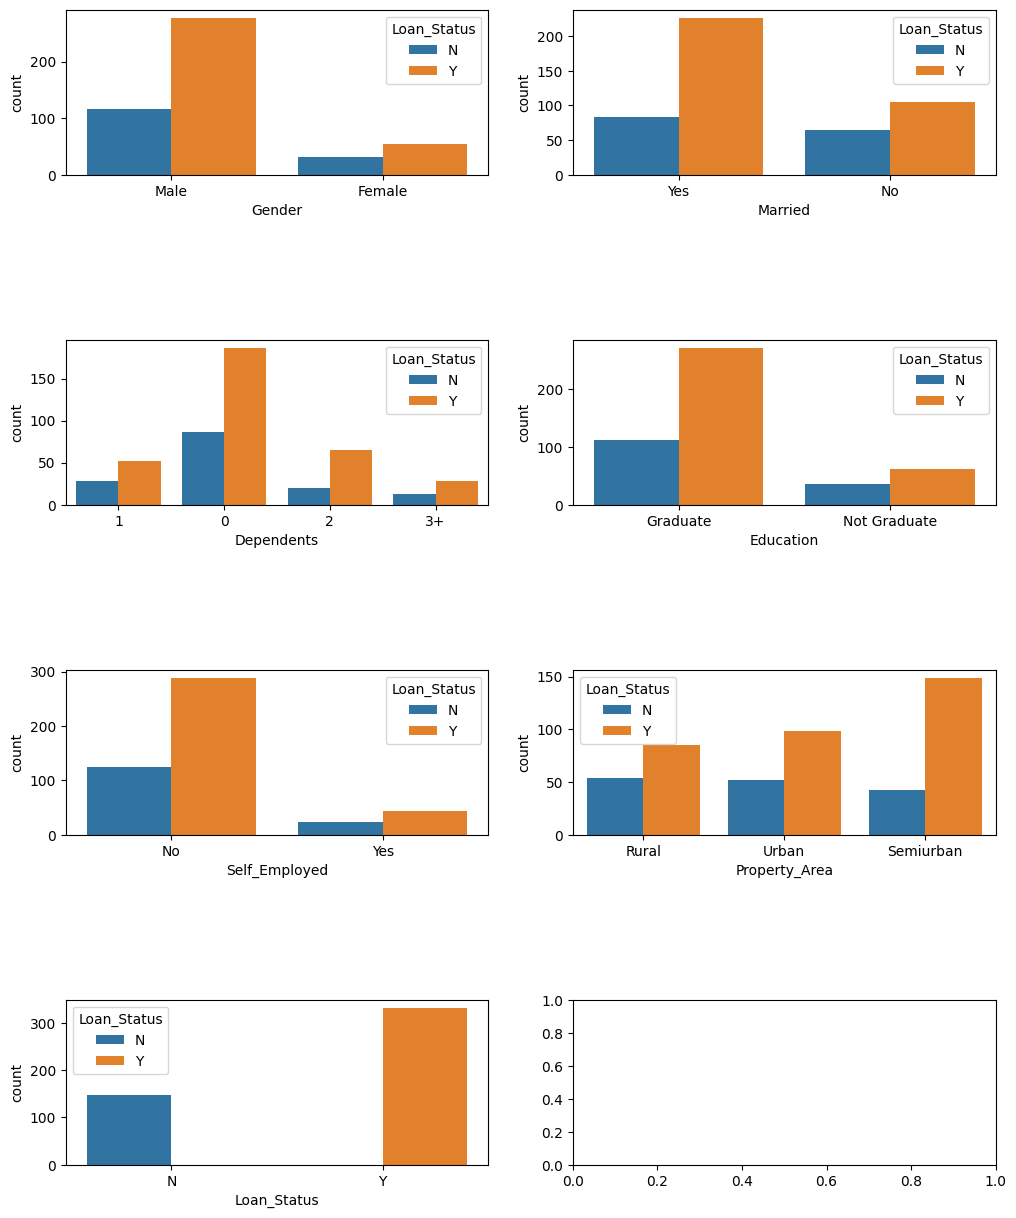

In [13]:
### Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

In [14]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       480.000000         480.000000  480.000000
mean       5364.231250        1581.093583  144.735417
std        5668.251251        2617.692267   80.508164
min         150.000000           0.000000    9.000000
25%        2898.750000           0.000000  100.000000
50%        3859.000000        1084.500000  128.000000
75%        5852.500000        2253.250000  170.000000
max       81000.000000       33837.000000  600.000000


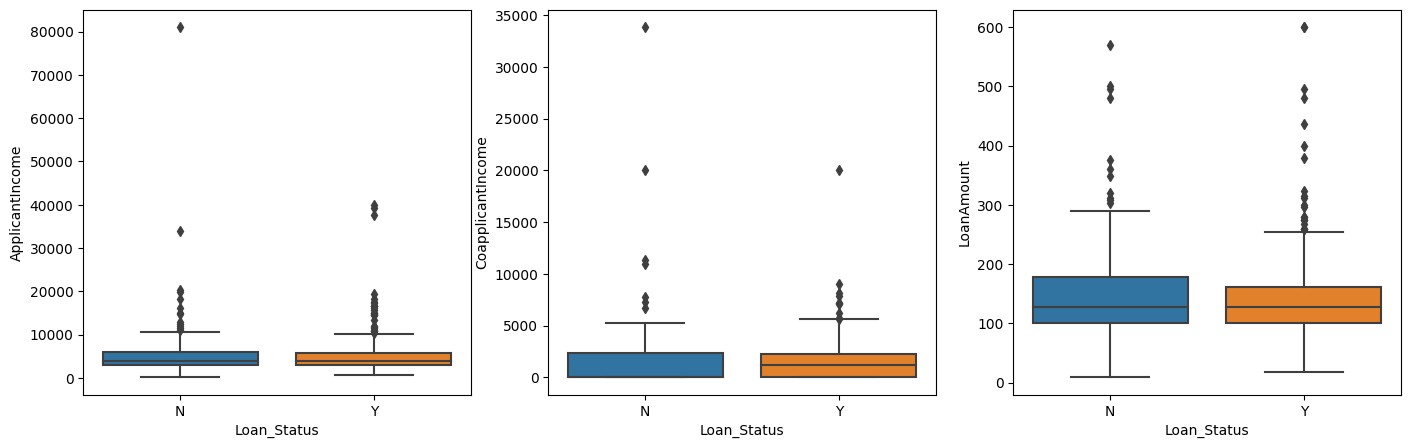

In [15]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=df,x='Loan_Status',ax=axes[idx])

print(df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

In [16]:
l= []
for i in categorical_columns:
  a = pd.DataFrame(pd.get_dummies(df[[i]],drop_first=True))
  l.append(a)

In [17]:
df_cat  = pd.concat(l,axis = 1)

In [18]:
df_cat

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1,1,1,0,0,0,0,0,0,0
1,1,1,0,0,0,0,1,0,1,1
2,1,1,0,0,0,1,0,0,1,1
3,1,0,0,0,0,0,0,0,1,1
4,1,1,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
475,0,0,0,0,0,0,0,0,0,1
476,1,1,0,0,1,0,0,0,0,1
477,1,1,1,0,0,0,0,0,1,1
478,1,1,0,1,0,0,0,0,1,1


In [19]:
df.drop(columns = categorical_columns,inplace =True)

In [20]:
df_new = pd.concat([df_cat,df],axis = 1)

In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender_Male              480 non-null    uint8  
 1   Married_Yes              480 non-null    uint8  
 2   Dependents_1             480 non-null    uint8  
 3   Dependents_2             480 non-null    uint8  
 4   Dependents_3+            480 non-null    uint8  
 5   Education_Not Graduate   480 non-null    uint8  
 6   Self_Employed_Yes        480 non-null    uint8  
 7   Property_Area_Semiurban  480 non-null    uint8  
 8   Property_Area_Urban      480 non-null    uint8  
 9   Loan_Status_Y            480 non-null    uint8  
 10  index                    480 non-null    int64  
 11  ApplicantIncome          480 non-null    int64  
 12  CoapplicantIncome        480 non-null    float64
 13  LoanAmount               480 non-null    float64
 14  Loan_Amount_Term         4

In [22]:
X = df_new.drop(columns = ['Loan_Status_Y'])

In [23]:
y = df_new['Loan_Status_Y']

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

Model

In [25]:
import xgboost as xgb

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics  import roc_auc_score,confusion_matrix ,f1_score

In [27]:
model_rdf = RandomForestClassifier()
model_rdf.fit(X_train , y_train)

RandomForestClassifier()

In [28]:
y_pred_rdf = model_rdf.predict(X_test)

In [29]:
roc_auc_score(y_test,y_pred_rdf)

0.7863636363636364

In [30]:
f1_score(y_test,y_pred_rdf)

0.8920863309352518

In [31]:
confusion_matrix(y_test,y_pred_rdf)

array([[19, 11],
       [ 4, 62]])

In [32]:
model_gdf = GradientBoostingClassifier()
model_gdf.fit(X_train , y_train)

GradientBoostingClassifier()

In [33]:
y_pred_gdf = model_gdf.predict(X_test)

In [34]:
roc_auc_score(y_test,y_pred_gdf)

0.7318181818181818

In [35]:
f1_score(y_test,y_pred_gdf)

0.8444444444444444

In [36]:
confusion_matrix(y_test,y_pred_gdf)

array([[18, 12],
       [ 9, 57]])

In [37]:
model_nb = GaussianNB()
model_nb.fit(X_train , y_train)

GaussianNB()

In [38]:
y_pred_nb = model_nb.predict(X_test)

In [39]:
roc_auc_score(y_test,y_pred_nb)

0.7378787878787878

In [40]:
f1_score(y_test,y_pred_nb)

0.8633093525179857

In [41]:
confusion_matrix(y_test,y_pred_nb)

array([[17, 13],
       [ 6, 60]])

In [42]:
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [43]:
y_pred_xgb = model_xgb.predict(X_test)

In [44]:
roc_auc_score(y_test,y_pred_xgb)

0.7333333333333334

In [45]:
f1_score(y_test,y_pred_xgb)

0.8333333333333334

In [46]:
confusion_matrix(y_test,y_pred_xgb)

array([[19, 11],
       [11, 55]])

In [49]:
import os
os.chdir('/content/drive/MyDrive/Placement_Task/ML_06')

In [47]:
import pickle

In [50]:
pickle.dump(model_gdf,open('rdf_model','wb'))